# Временные ряды. Фазовые траектории.  
Работа проделывалась на основании данной статьи: http://www.machinelearning.ru/wiki/index.php?title=%D0%9F%D1%80%D0%BE%D0%B3%D0%BD%D0%BE%D0%B7%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5_%D0%B2%D1%80%D0%B5%D0%BC%D0%B5%D0%BD%D0%BD%D1%8B%D1%85_%D1%80%D1%8F%D0%B4%D0%BE%D0%B2_%D0%BC%D0%B5%D1%82%D0%BE%D0%B4%D0%BE%D0%BC_SSA_%28%D0%BF%D1%80%D0%B8%D0%BC%D0%B5%D1%80%29

In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
from matplotlib import pylab as plt

Считаем данные из файла.

In [2]:
data = pd.read_csv('Climate.csv')
data.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


Будем интересоваться только температурой. Начертим график.

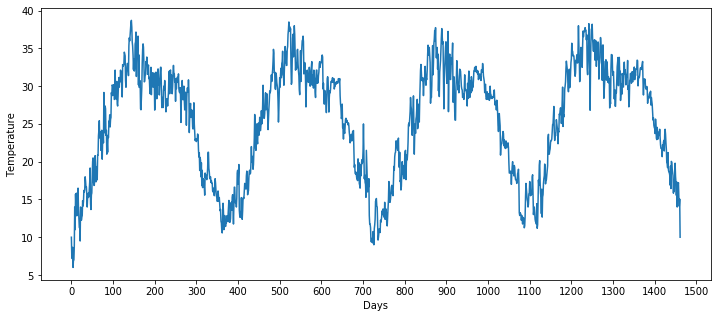

In [3]:
plt.figure(figsize=(12, 5))
plt.xlabel("Days")
plt.ylabel("Temperature")
plt.xticks(np.arange(0, 1501, 100))
plt.plot(data.meantemp)

Наблюдаем ярко выраженный период длинною в год.  
Построим матрицу Ганкеля. В качестве ширины окна возьмем длину периода, т.е. 365.

In [4]:
temp = np.array(data.meantemp)
L = 365
X = np.array([temp[i:i+L+1] for i in range(temp.size - L - 1)])

Найдем сингулярное разложение.

In [5]:
V, D, U = np.linalg.svd(X)

Нарисуем график главных компонент (в логарифмическом масштабе).

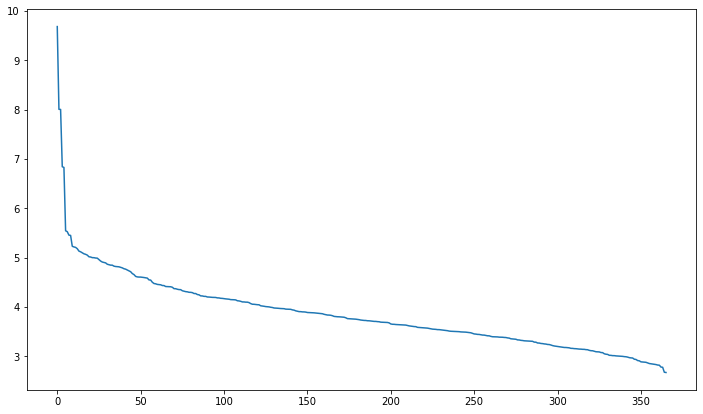

In [6]:
plt.figure(figsize=(12, 7))
plt.xticks(np.arange(0, 1000, 50))
plt.plot(np.log(D))

Попробуем нарисовать первые 10.

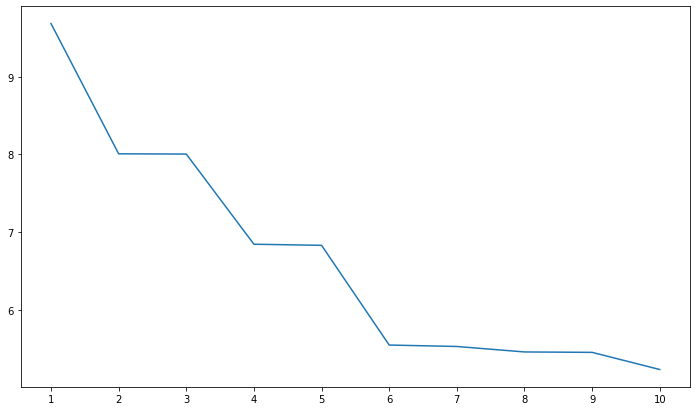

In [7]:
plt.figure(figsize=(12, 7))
plt.xticks(np.arange(1, 11))
plt.plot(np.arange(1, 11), np.log(D[:10]))

Паре близких собственных чисел соответствуют главные компоненты, отвечающие одной частоте (так, во всяком случае, указано в статье). Таковыми, например, являются 2 и 3. Отобразим соответствующие им вектора на графике.

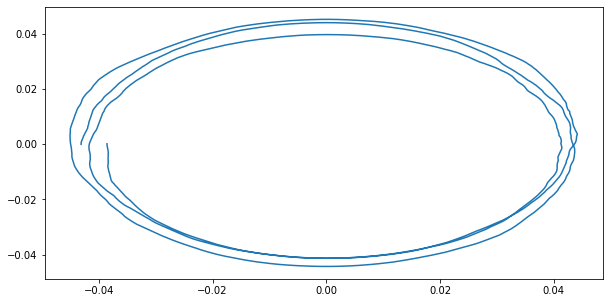

In [8]:
plt.figure(figsize=(10, 5))
plt.plot(V[:, 1], V[:, 2])

На графике ярко обозначен эллипс.  
Для сравнения построим такой же график для 1 и 2 значений.

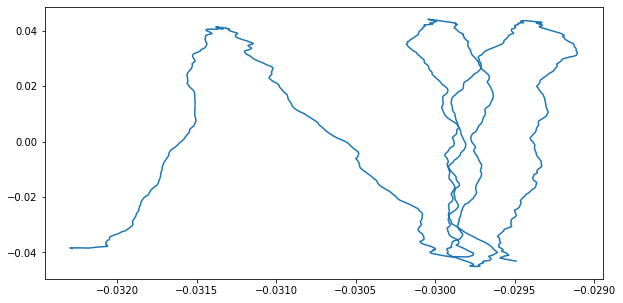

In [9]:
plt.figure(figsize=(10, 5))
plt.plot(V[:, 0], V[:, 1])

Видим, что никакой хорошей фигуры не получилось.